In [2]:
import nltk
from nltk import sent_tokenize, word_tokenize, WordNetLemmatizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, SnowballStemmer

from sklearn.feature_extraction.text import CountVectorizer

import numpy as np

from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
text_file = open("nyt_test.txt")
text = text_file.read()

# Wordcloud

(-0.5, 399.5, 199.5, -0.5)

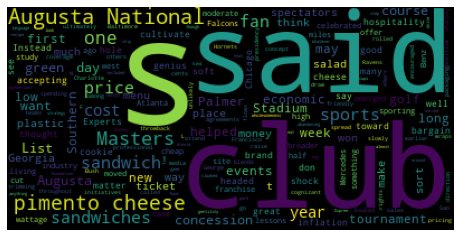

In [3]:
wordcloud = WordCloud().generate(text)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")

# Cleaning

817
[('augusta', 17), ('cheese', 13), ('national', 12), ('club', 12), ('said', 12), ('pimento', 11), ('masters', 9), ('sandwich', 8), ('one', 8), ('sports', 8)]


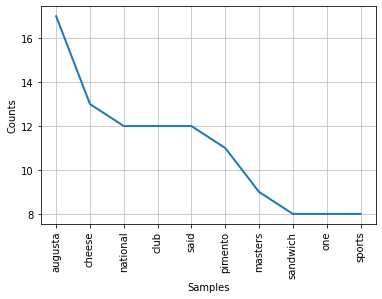

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [4]:
def clean_text(text):
    words = word_tokenize(text)
    words_no_punc = [word.lower() for word in words if word.isalpha()]

    stops = stopwords.words("english")
    no_stop = [word for word in words_no_punc if word not in stops]

    return no_stop

clean = clean_text(text)
print(len(clean))
fdist_clean = FreqDist(clean)
print(fdist_clean.most_common(10))
fdist_clean.plot(10)

# Lemmatizing

In [5]:
lemmatizer = WordNetLemmatizer()

print(f'Before lemma: {len(np.unique(clean))}')
lemma = [lemmatizer.lemmatize(word) for word in clean]
print(f'After lemma: {len(np.unique(lemma))}')

Before lemma: 482
After lemma: 467


# Stemming

In [6]:
porter = PorterStemmer()

print(f'Before stem: {len(np.unique(clean))}')
stem = [porter.stem(word) for word in clean]
print(f'After stem: {len(np.unique(stem))}')

Before stem: 482
After stem: 451


# Summary

In [7]:
tokenized = word_tokenize(text)
nr_words_start = len(tokenized)
nr_unique_start = len(np.unique(tokenized))

clean = clean_text(text)
nr_words_clean = len(clean)
nr_unique_clean = len(np.unique(clean))

porter = PorterStemmer()
stems = [porter.stem(word) for word in clean]
nr_words_stem = len(stem)
nr_unique_stem = len(np.unique(stems))

print(f"""
Nr words to begin with: {nr_words_start},
Nr unique to begin with: {nr_unique_start},

Nr words after cleaning: {nr_words_clean},
Nr unique after cleaning: {nr_unique_clean},

Nr words after stem: {nr_words_stem},
Nr unique after stem: {nr_unique_stem},

From start to finish:
% less words: -{int((1- nr_words_stem/nr_words_start)*100)}%
% less unique words: -{int((1- nr_unique_stem/nr_unique_start)*100)}%
""")


Nr words to begin with: 1821,
Nr unique to begin with: 654,

Nr words after cleaning: 817,
Nr unique after cleaning: 482,

Nr words after stem: 817,
Nr unique after stem: 451,

From start to finish:
% less words: -55%
% less unique words: -31%



## Post crunch wordcloud

(-0.5, 399.5, 199.5, -0.5)

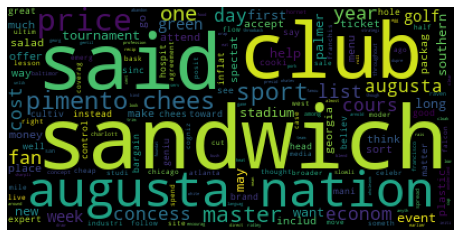

In [11]:
back_to_text = ' '.join(stems)

wordcloud = WordCloud().generate(back_to_text)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")